# [LAB 11] 2. 상관분석
상관분석은 두 변수가 함꼐 움직이는 정도를 숫자로 요약해 관계의 방향과 강도를 확인하는 절차


실생활 예시 : - 공부 시간이 늘어나면 성적도 올라갈까? (양의 상관관계) - 운동 시간이 늘어나
면 체중이 줄어들까? (음의 상관관계) - 키와 수학 성적은 관계가 있을까? (상관관계 없음)


상관분석을 통해 두 변수 간의 선형 관계 여부를 통계적으로 검정할 수 있으며, 데이터 간 연관성을 빠르게 파악할 수 있다

> 주의: 상관관계가 있다고 해서 인과관계가 있는 것은 아니라

### 상관분석의 가정
| 가설 | 내용 |
|------|--------------------------------------------------------------|
| 귀무가설 (H₀) | 두 변수는 상관관계가 없다. *(r = 0)* |
| 대립가설 (H₁) | 두 변수는 상관관계가 있다. *(r ≠ 0)* |


### 상관분석의 통계량 > 상관계수
두 변수의 상관관계를 나타내는 통계량으로 공분산 값을 -1 ~ 1 범위로 표준화 시킨 값이다

파이썬으로 상관분석을 수행하면 내부적으로 T 검정통계량을 얻은 p value 값을 함께 구할 수 있다

이 값이 0.05 이하인 경우, 대립가설을 채택하게 되어 상관계수를 통해 두 변수가 얼마나 관련되어 있는지, 관련성의 정도를 파악할 수 있다

#### [1] 상관계수 해석 방법
상관계수의 절대값이 1에 가까울 수록 관련성이 크고 선형성이 뚜렷함을 의미한다

| 상관 계수 범위      | 해석                           |
|----------------------|--------------------------------|
| 0.7 < r ≤ 1          | 강한 양(+)의 상관이 있다       |
| 0.3 < r ≤ 0.7        | 약한 양(+)의 상관이 있다       |
| 0 < r ≤ 0.3          | 거의 상관이 없다               |
| r = 0                | 상관관계(선형, 직선)가 존재하지 않는다 |
| -0.3 ≤ r < 0         | 거의 상관이 없다               |
| -0.7 ≤ r < -0.3      | 약한 음(-)의 상관이 있다       |
| -1 ≤ r < -0.7        | 강한 음(-)의 상관이 있다       |



<주의사항>
- 표본 크기가 작으면 r 이 커보여도 우연일 수 있따. pvalue, 신뢰구간을 함꼐 확인한다
- 상관관계가 인과관계를 나타내지는 않는다. 매개 변수나 숨은 제 3 변수가 있을 수 있으니 주의하자
- 여러 변수의 조합을 반복해서 보면 우연 상관이 늘어나므로 해석 전 설계와 도메인 지식이 중요하다

#### [2] 피어슨 상관계수
가장 대표적인 상관계수로 선형적인 상관계수를 측정한다
공분산을 두 변수의 표준편차로 나눈 값이다

데이터가 선형이고 두 개의 변수 모두 이상치가 없을 경우에 사용한다

> 상관계수 자체는 NumPy 나 DataFrame 객체 자체만트로도 구할 수 있지만 p-value 를 알 수 없기 떄문에 결과가 유의한지 판별할 수 없다

#### [3] 스피어만 상관계수
데이터가 비선형 또는 둘 중 하나라도 많을 경우 사용한다
순위 기반으로 계싼하믈 이상치에 덜 민감하다

### #01. 준비작업
#### 1. 패키지 가져오기

In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
from scipy.stats import zscore, pearsonr, spearmanr

#### 2. 그래프 초기화

In [3]:
#한글을 지원하는 폰트 파일의 경로
font_path ='C:\\Data_Analysis_Basic\\[LAB-06] 데이터 시각화 개요\\NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### 3. 데이터 가져오기

In [4]:
origin = load_data('language_math_scores')
print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")
print("\n===== 타입확인 =====")
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab11_/language_math_scores.xlsx
[desc] 어느 학급의 언어영역과 수리영역 점수를 기록한 가상의 데이터 셋

field     type    description
--------  ------  -------------
언어영역  INT     언어영역 점수
수리영역  INT     수리영역 점수


===== 데이터 크기 확인 =====
데이터셋 크기: (50, 2)
열 개수: 2
행 개수: 50

===== 타입확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   언어영역    50 non-null     int64
 1   수리영역    50 non-null     int64
dtypes: int64(2)
memory usage: 932.0 bytes
None


,언어영역,수리영역
0,66,66
1,58,70
2,73,74
3,52,58
4,72,79


### #02.상관분석의 가정
#### 1. 선형성
X가 증가할 떄 Y 도 증가하거나 감소하는 형태가 선형으로 분포해야 한다. 곡선 형태로 ㅂㄴ포할 경우 상관계수가 매우 낮거나 0의 상관을 보인다. 산점도 그래프를 통해확인하는 것이 일반적이다


### 상관관계의 유형

| 관계       | 설명 |
|------------|------|
| 정의관계   | x가 증가할 때 y도 증가 (상관계수가 0보다 큼) |
| 역의관계   | x가 증가할 때 y는 감소 (상관계수가 0보다 작음) |
| 선형관계   | 직선에 가까운 배치 (상관계수가 1에 가까움) |
| 비선형관계 | 곡선에 가까운 배치 (상관계수가 1에 가깝지 않음) |


1) 산점도 그래프
상관계수의 정도를 좌표평면 위에 점들로 시각화 한 그래프.두 변수 간의 영향력을 보여주기 위해 가로 축과 세로 축에 데이터 포인트를 그리는 그래프.
포인터들이 오밀조밀 뭉쳐 있으면 두 변수는 서로 관련성 정도가 높고 흩어져 있으면 관련성이 낮다고 분석한다

2) 산점도 그래프의 의미 > 상관 관계 
 산점도에서 사용되는 두 변수 간의 관계
그래프에 표시되는 마커들의 배열이 직선에 가까운 경우 두 변수의 상관 관계가 높다.
마커가 산점도에 균등하게 분산되는 경우 상관 관계가 낮거나 0이다.


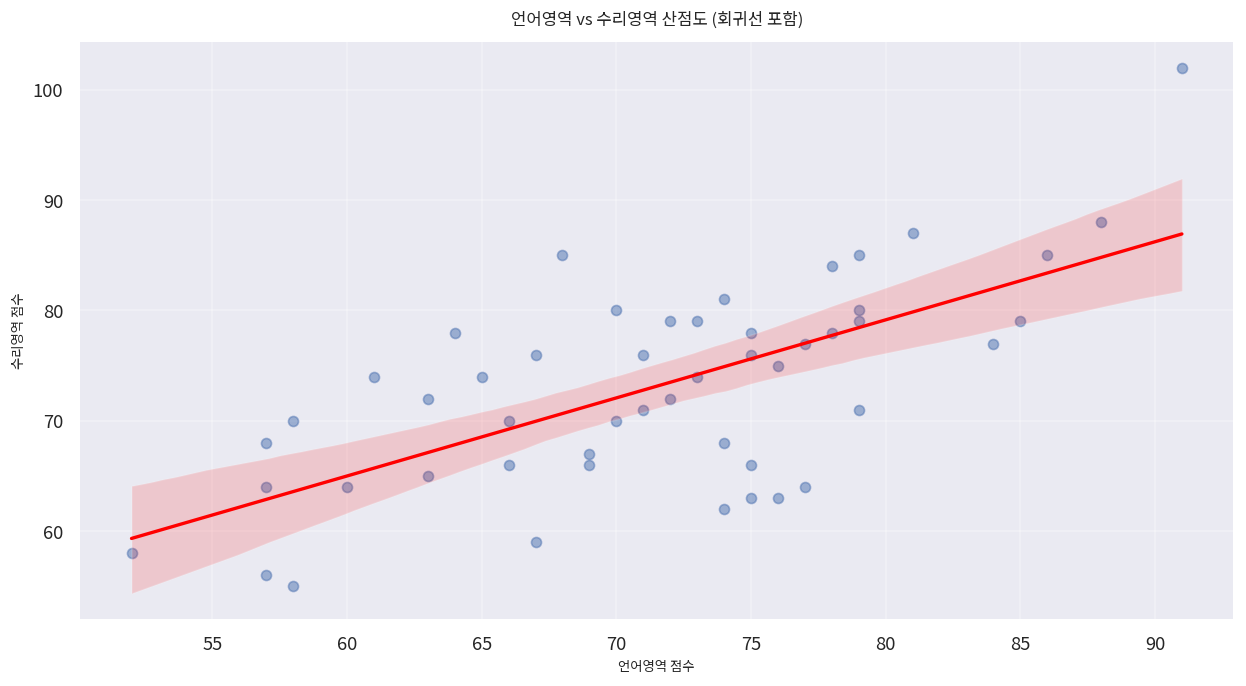

In [5]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) Scatter Plor 그리기
sb.regplot(data=origin , x = '언어영역' , y='수리영역' , scatter_kws = {'alpha':0.5}, line_kws ={'color':'red' , 'linewidth' : 2})

# 3) 그래프 꾸미기
ax.set_title('언어영역 vs 수리영역 산점도 (회귀선 포함)', fontsize=10, pad=10)
ax.set_xlabel('언어영역 점수', fontsize=8)
ax.set_ylabel('수리영역 점수', fontsize=8)
ax.grid(True, alpha=0.3)           
# 배경 격자 표시

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


<인사이트>
- 점들이 대체로 우상향 하는 패턴을 보임
- 빨간색 회귀선을 중심으로 점들이 모여 있어 선형 관계가 있어 보임
- 이는 언어 영역 점수가 높을수록 수리 영역 점수도 높아지는 양의 상관관계를 시사함
- 하지만 눈으로만 판단하면 주관적일 수 있으므로 통계적 검정을 통해 선형성을 확인해야함

#### 4) 선형성 통계적 검정 (Ramsey RESET Test)
Ramsey RESET Test 는 회귀 모델이 선형인지 검정하는 방법
- p > 0.05 : 선형성 적합 (피어슨 상관계수 사용 가능)
- p <= 0.05 : 선형성 위반 (스피어만 상관계수 사용 권장)

In [6]:
x = origin ['언어영역']
y = origin ['수리영역']

X = sm.add_constant(x)
model=sm.OLS(y,X).fit()
reset = linear_reset(model,power=2,use_f = True)


#선형성 적합 여부 (True=적합, False=부적합)
linearity_ok = reset.pvalue > 0.05
print(f"Ramsey RESET Test : {'선형성 적합' if linearity_ok else '선형성 위반'} (p-value: {reset.pvalue:.4f})")


Ramsey RESET Test : 선형성 적합 (p-value: 0.1884)


### 2. 분포 왜도를 통한 이상치 점검
피어슨 상관계수 (Pearson r) 는 이상치에 매우 민감하다. 즉, 데이터의 대부분이 규칙적으로 퍼져 있어도 극단값 하나가 상관 계수를 크게 끌어올리거나 끌어 내릴 수 있다. 상관 분석에 사용되는 변수 중 하나라도 이상치가 존재한다면 스피어만 상관계수를 사용해야 한다

In [ ]:
# 이상치와 왜도 검정
data = origin[['언어영역', '수리영역']]
results = {}

for col in data.columns:
    temp = data[col].dropna()

    # 왜도 계산
    skew_original = temp.skew()

    # Z-score 기반 이상치 탐지 (|z| > 3)
    z_scores = zscore(temp)
    outlier_count = int(np.sum(np.abs(z_scores) > 3))

    # 로그 변환 후 왜도 계산 (음수 대비 +1)
    data_log = np.log1p(temp - temp.min() + 1)
    skew_log = data_log.skew()

    # 로그 변환 필요 여부 판단
    need_log = (abs(skew_original) > 1) and (abs(skew_log) < abs(skew_original))

    results[col] = {
        'original_skew': skew_original,
        'log_skew': skew_log,
        'outliers(|z|>3)': outlier_count,
        'log_recommended': need_log,
    }

# 결과 dataframe 변환
results_df = pd.DataFrame(results).T
display(results_df)

# 이상치 검정 결과
outlier_flag = len(results_df[results_df['outliers(|z|>3)'] > 0]) > 0


if outlier_flag:
    print("이상치가 발견되어 스피어만 상관계수 사용")
else:
    print("이상치가 발견되지 않아 피어슨 상관계수 사용")


,original_skew,log_skew,outliers(|z|>3),log_recommended
언어영역,-0.102559,-1.735952,0,False
수리영역,0.367414,-1.529107,1,False


이상치가 발견되어 스피어만 상관계수 사용


[언어영역] - 왜도 : -0.103 (정규분포에 가까움) - 이상치 개수 0개
[수리영역] - 왜도 : 0.367 (정규분포에 가까움) - 이상치 개수 1개
(이상치가 발견되어 스피어만 상관계수를 사용해야함)

### #03. 상관분석
#### 1.피어슨 상관계수

In [9]:
pearson_r, pearson_p = pearsonr(origin['언어영역'], origin['수리영역'])
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(pearson_r, pearson_p,  "대립" if pearson_p <= 0.05 else "귀무")

'statistic: 0.671, p-value: 0.000, 대립가설 채택'

#### 2. 스피어만 상관계수

In [10]:
spearman_r, spearman_p = spearmanr(origin['언어영역'], origin['수리영역'])
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(spearman_r, spearman_p,  "대립" if spearman_p <=
0.05 else "귀무")

'statistic: 0.599, p-value: 0.000, 대립가설 채택'

#### 3. 가정에 따른 상관계수 선택
- 선형 + 왜도 / 이상치 영향 적음 > 피어슨 우선
- 단조 비선형 또는 이상치 많음/왜도 큼 ? 스피어만 우선

In [11]:
# 1. 상관계수 선택
if linearity_ok and not outlier_flag:
    chosen = 'pearson'
    corr, pval = pearson_r, pearson_p
    rationale = '선형성 만족 + 왜도/이상치 영향 작음으로 판단'
else:
    chosen = 'spearman'
    corr, pval = spearman_r, spearman_p
    rationale = '비선형(또는 이상치 영향) 가능성 고려'

print('=' * 50)
print('📊 상관계수 요약')
print('=' * 50)

print(f"Pearson r: {pearson_r:.3f}, p-value: {pearson_p:.4f}")
print(f"Spearman rho: {spearman_r:.3f}, p-value: {spearman_p:.4f}")

print('\n' + '=' * 50)
print('✅ 최종 선택 결과')
print('=' * 50)

print(f"✔ 선택된 방법: {chosen}")
print(f"✔ 상관계수: {corr:.3f}")
print(f"✔ p-value: {pval:.4f}")
print(f"✔ 선택 근거: {rationale}")

print('=' * 50)


📊 상관계수 요약
Pearson r: 0.671, p-value: 0.0000
Spearman rho: 0.599, p-value: 0.0000

✅ 최종 선택 결과
✔ 선택된 방법: spearman
✔ 상관계수: 0.599
✔ p-value: 0.0000
✔ 선택 근거: 비선형(또는 이상치 영향) 가능성 고려


### 4. 상관행렬

📊 상관행렬(Correlation Matrix)

여러 변수 간의 상관계수를 한눈에 볼 수 있도록 정리한 표

🔍 특징

행과 열에 같은 변수들이 배치

대각선 값은 항상 1 (자기 자신과의 상관계수)

대칭 행렬
→ A와 B의 상관계수 = B와 A의 상관계수

📘 해석 방법
상관계수 범위	의미
1에 가까울수록	강한 양(+)의 상관관계 (한 변수가 증가하면 다른 변수도 증가)
-1에 가까울수록	강한 음(-)의 상관관계 (한 변수가 증가하면 다른 변수는 감소)
0에 가까울수록	상관관계가 없음 (두 변수가 서로 독립적)
🛠 활용

3개 이상의 변수가 있을 때
→ 모든 변수 쌍의 상관관계를 한 번에 확인 가능

다중공선성(multicollinearity) 검사
→ 독립변수들 간 상관계수가 0.7~0.8 이상이면 위험

변수 선택 시 활용
→ 종속변수와 상관관계가 높은 독립변수를 선택하는 데 도움

In [12]:
corr_matrix = origin[['언어영역','수리영역']].corr(method=chosen)
corr_matrix

,언어영역,수리영역
언어영역,1.000000,0.599095
수리영역,0.599095,1.000000


#### 5. 상관계수 히트맵
상관행렬을 시각화한 그래프

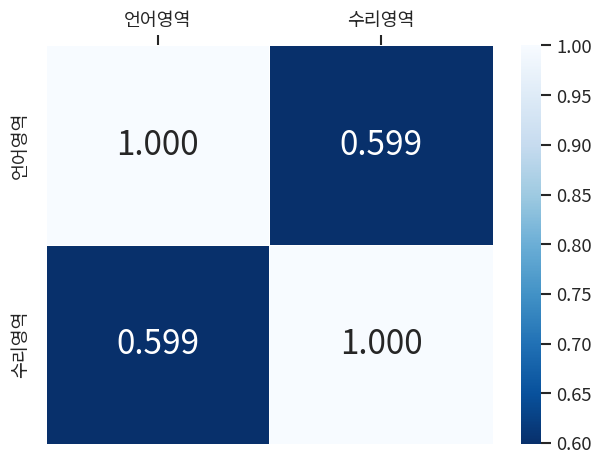

In [13]:
# 1) 그래프 초기화
width_px  = 650          # 그래프 가로 크기
height_px = 500          # 그래프 세로 크기
rows = 1                 # 그래프 행 수
cols = 1                 # 그래프 열 수

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) heatmap 그리기
sb.heatmap(
    data=corr_matrix,
    annot=True,
    fmt="0.3f",
    linewidth=0.5,
    cmap="Blues_r",
    annot_kws={"size": 20}
)

# 3) 그래프 꾸미기
ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.tick_top()      # x축의 변수 이름을 상단으로 이동

# 4) 출력
plt.tight_layout()       # 여백 제거
plt.show()               # 그래프 화면 출력
plt.close()              # 그래프 작업 종료


### #04.인사이트
#### 1. 피어슨 r 상관계수를 선택한 경우

본 분석에서는 {변수1}과 {변수2} 간 상관관계를 검토하였다.
데이터 점검 결과, 두 변수의 관계는 선형적이며 이상치의 영향도 크지 않아 피어슨 상관계수를 사용하였다.
분석 결과, 피어슨 상관계수는 r = {r값}, p = {p값}로 나타나 두 변수 간 {상관 방향} 관계가 통계적으로 유의함을 확인하였다.



> 본 분석에서는 언어 영역과 수리영역 점수 간 상관관계를 검토하였다. 데이터 점검 결과 두 변수의 관계는 선형적이며 이상치의 영향도 크지 않아 피어슨 상관계수를 사용하였다.

분석 결과, 스피어만 상관계수는  rho = 0.599, p < .001로 나타나 두 변수 간 유의한 양의 단조 관계가 존재함을 확인하였다.